In [53]:
import pandas as pd
import sklearn as sk

Substitua `dataset_link` pelo dataset de sua escolha

In [63]:
# Usa o dataset 'annealing'
dataset_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1'

# Carrega o dataset para um DataFrame do Pandas
df = pd.read_csv(dataset_link, header = None)

# Renomeia a coluna que será usada para a classificação
df.rename(columns={10: 'CLASS'}, inplace=True)

# Impime as primeiras linhas para verificação
df.head()

,0,1,2,3,4,5,6,7,8,9,CLASS,11,12
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


Solucionamos os valores faltando (?) substituindo eles pela moda da coluna

In [64]:
from sklearn.impute import SimpleImputer

# Substituí os valores faltando (?) pela moda daquela coluna
imp = SimpleImputer(missing_values='?', strategy='most_frequent')
imp.fit(df)
df_no_missing = imp.transform(df)
df = pd.DataFrame(df_no_missing)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,E1,M,3,1818,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,1000,1,N,THROUGH,WOOD,MEDIUM,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,1000,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


Remova as colunas que não deseja passando o indice delas para `drop` (use a váriavel boleana e a array para remover as colunas)

In [65]:
# Marca se os dados devem ser normalizados ou não
drop_col = True
cols_to_drop = [0, 3, 12]

# Remove colunas do DataFrame pois elas não são úteis ao modelo
if drop_col:
  df = df.drop(cols_to_drop, axis=1)

# Impime as primeiras linhas para verificação
df.head()

,1,2,4,5,6,7,8,9,10,11
0,M,3,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S
1,A,25,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S
2,A,39,AQUEDUCT,1000,1,N,THROUGH,WOOD,MEDIUM,S
3,A,29,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S
4,M,23,HIGHWAY,1000,2,N,THROUGH,WOOD,MEDIUM,S


Separa a coluna que vai servir para a classificação, passe o índice dela considerando as colunas que já fora dropadas

In [66]:
# Renomeia a coluna que será usada para a classificação DE NOVO porque algumas do pré-processamento
df.rename(columns={10: 'CLASS'}, inplace=True)

# Separa a "classe" do resto do DataFrame
y = df[['CLASS']]

# Impime as primeiras linhas para verificação
y.head()

,CLASS
0,SHORT
1,SHORT
2,MEDIUM
3,SHORT
4,MEDIUM


Remove a coluna que foi separada para ser a "classe"

In [67]:
# Remove a coluna "class" que foi separada, mantendo somente as features
X = df.drop(['CLASS'], axis = 1)

# Impime as primeiras linhas para verificação
X.head()

,1,2,4,5,6,7,8,9,11
0,M,3,HIGHWAY,1000,2,N,THROUGH,WOOD,S
1,A,25,HIGHWAY,1037,2,N,THROUGH,WOOD,S
2,A,39,AQUEDUCT,1000,1,N,THROUGH,WOOD,S
3,A,29,HIGHWAY,1000,2,N,THROUGH,WOOD,S
4,M,23,HIGHWAY,1000,2,N,THROUGH,WOOD,S


Converte os dados categóricos para dados numéricos para que eles possam ser usados com o sklearn

In [69]:
# Colunas com dados categóricos
categorical_cols = [1, 4, 7, 8, 9, 11]

# Impime as primeiras linhas para verificação
X = pd.get_dummies(X, columns=categorical_cols)

# Impime as primeiras linhas para verificação
X.head()

,2,5,6,1_A,1_M,1_O,1_Y,4_AQUEDUCT,4_HIGHWAY,4_RR,4_WALK,7_G,7_N,8_DECK,8_THROUGH,9_IRON,9_STEEL,9_WOOD,11_F,11_S,11_S-F
0,3,1000,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
1,25,1037,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,39,1000,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
3,29,1000,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
4,23,1000,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0


Faz o pré-processamento dos dados necessários como por exemplo a normalização (marque as variáveis como true para fazer o pré-processamento)

In [70]:
from sklearn import preprocessing

# Marca se os dados devem ser normalizados ou não
normalize = True

# Faz a normalização dos dados se necessário
if normalize:
  min_max_scaler = preprocessing.MinMaxScaler()
  X_normalized = min_max_scaler.fit_transform(X)
  X = pd.DataFrame(X_normalized)

# Impime as primeiras linhas para verificação
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.039216,0.052211,0.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.470588,0.062067,0.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.745098,0.052211,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.549020,0.052211,0.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.431373,0.052211,0.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Cria a árvore de decisão e faz o 10-fold cross-validation

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Cria a árvore de decisão
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)

# Faz a 10-fold cross-validation
scores = cross_validate(dt, X, y, cv=10, return_estimator=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2)) # 95% confidence

Accuracy: 0.69 (+/- 0.20)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mostra a melhor arvore de decisão na tela, lembre de substituir o nome das classes

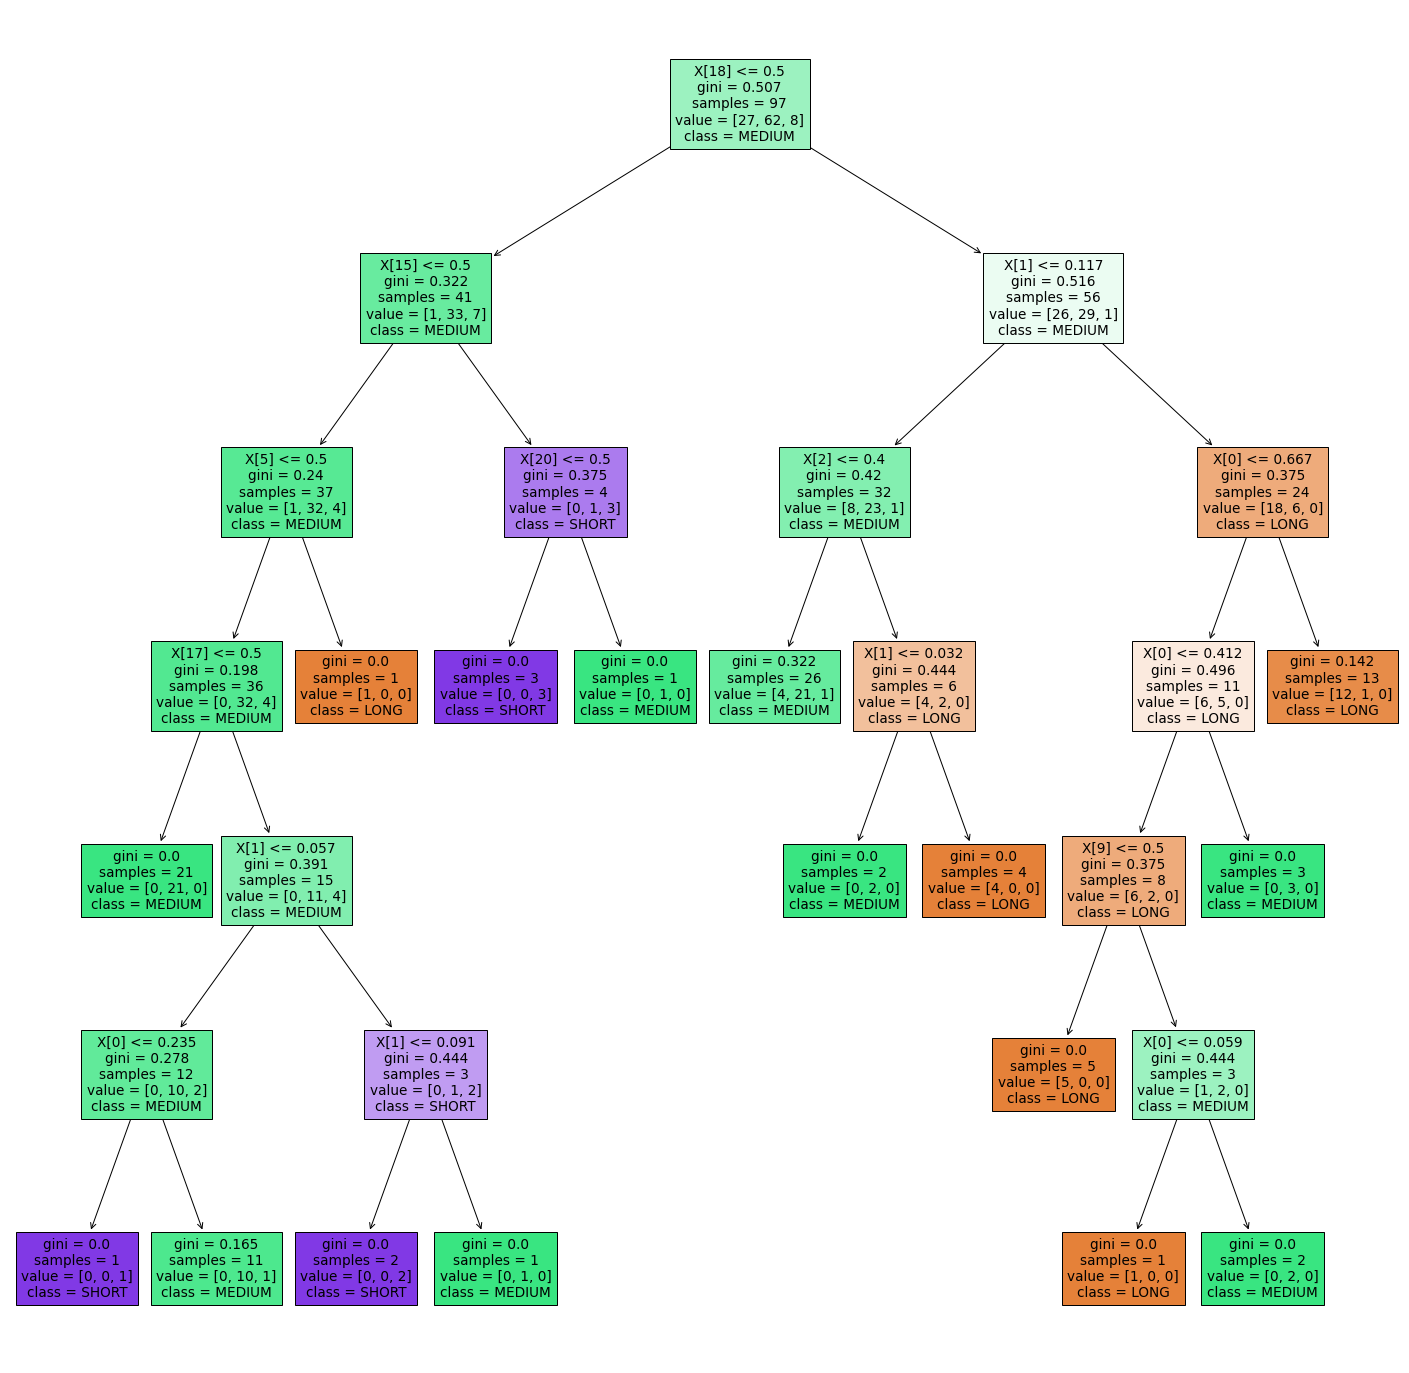

In [74]:
import matplotlib.pyplot as plt
from sklearn import tree

# Mostra a melhor árvore de decisão
max_score = scores['test_score'].max()
for i in range(len(scores['test_score'])):
  if scores['test_score'][i] == max_score:
    best_dt = scores['estimator'][i]

# Exibe a árvore
cn = ['LONG', 'MEDIUM', 'SHORT']
fig, ax = plt.subplots(figsize=(25, 25)) 
tree.plot_tree(best_dt, class_names=cn, filled = True);
plt.show()